In [15]:
#import all the useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats


In [16]:
#Task 1
#Load the titanic dataset from seaborn
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [17]:
#Task 2. -.1
df.isnull().sum()  #the code calculates and displays the number of missing values in each column of your Titanic dataset.

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


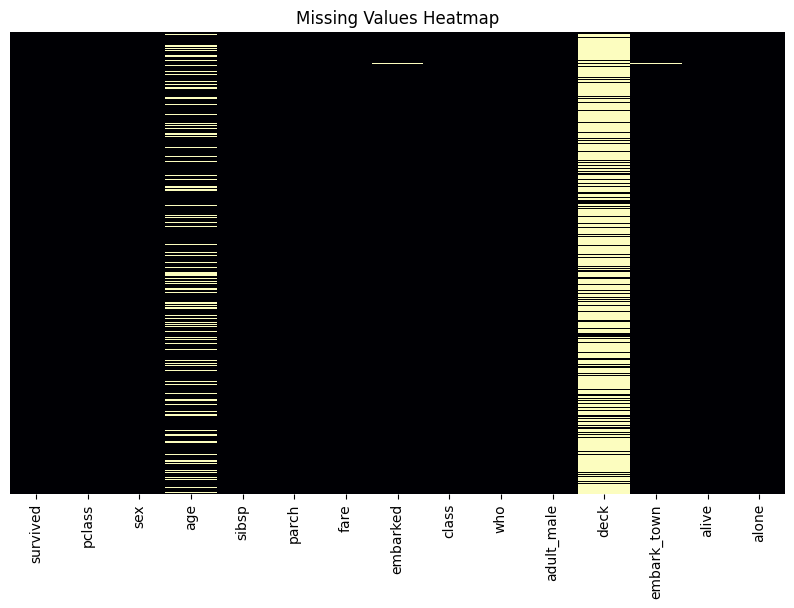

In [18]:
#Visualizing missing data with a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap= 'magma', cbar=False, yticklabels= False)
plt.title('Missing Values Heatmap')
plt.show()

In [19]:
#Task 3 handling missed data
# Fill missing values for 'age'
df['age'] = df['age'].fillna(df['age'].mean())
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [46]:
df['deck'] = df['deck'].fillna(df['deck'].mode()[0])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [45]:
df['deck'].mode()[0]

'C'

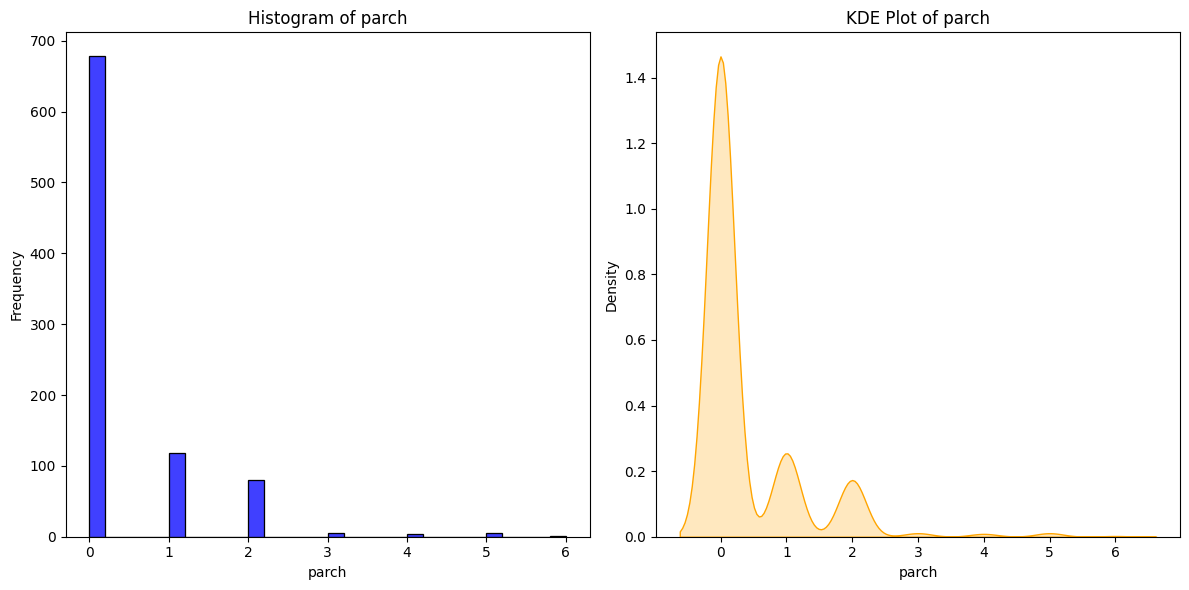

In [42]:
#Task 4
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['parch'], bins=30, kde=False, color='blue', edgecolor='black')
plt.title('Histogram of parch')
plt.xlabel('parch')
plt.ylabel('Frequency')

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(df['parch'], fill=True, color='orange')
plt.title('KDE Plot of parch')
plt.xlabel('parch')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


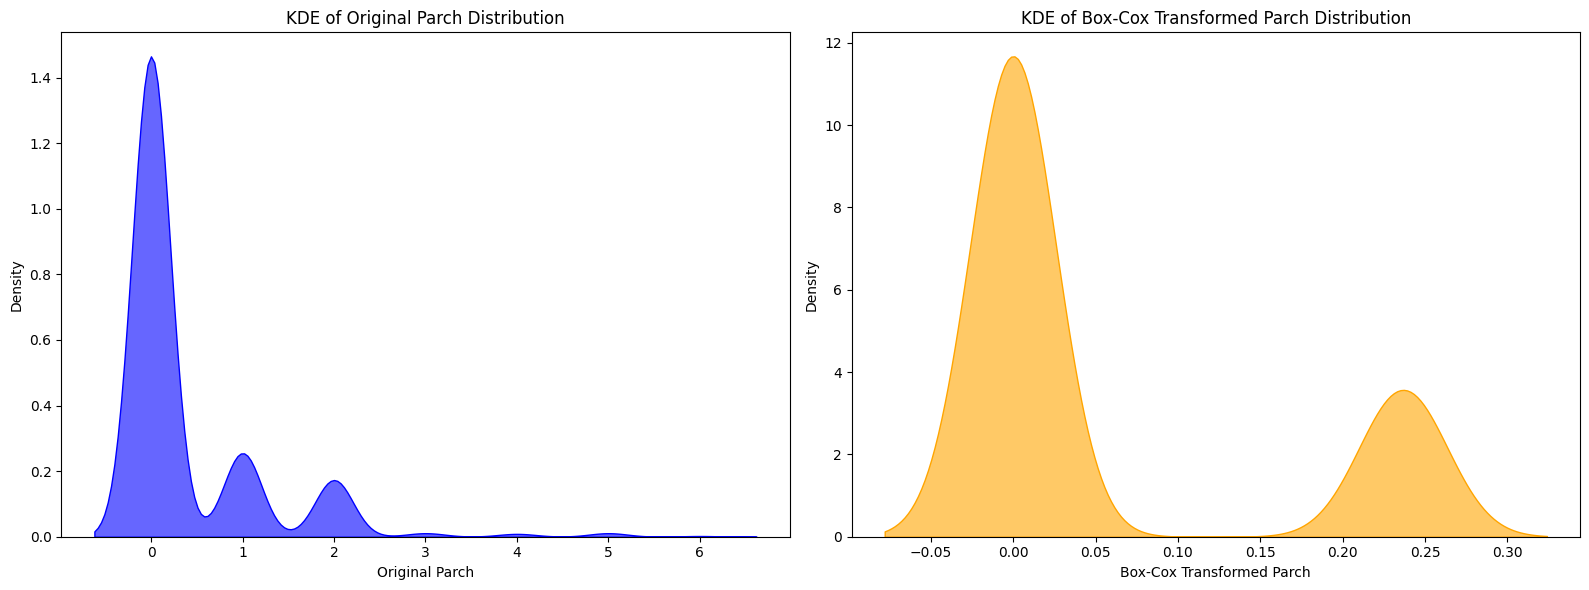

In [47]:
# from scipy import stats # incase you haven’t installed stats before
# Apply Box-Cox Transformation
# Box-Cox requires positive data, so we ensure 'parch' is > 0
# Since 'parch' is count data, we add a small constant
df['parch_shifted'] = df['parch'] + 1  # Shift by 1 to avoid zeros
df['parch_boxcox'], _ = stats.boxcox(df['parch_shifted'])

# Step 3: Visualize the distributions using KDE
plt.figure(figsize=(16, 6))

# KDE plot for original parch
plt.subplot(1, 2, 1)
sns.kdeplot(df['parch'], fill=True, color='blue', alpha=0.6)
plt.title('KDE of Original Parch Distribution')
plt.xlabel('Original Parch')
plt.ylabel('Density')

# KDE plot for Box-Cox transformed parch
plt.subplot(1, 2, 2)
sns.kdeplot(df['parch_boxcox'], fill=True, color='orange', alpha=0.6)
plt.title('KDE of Box-Cox Transformed Parch Distribution')
plt.xlabel('Box-Cox Transformed Parch')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [48]:
#task 5
scaler = MinMaxScaler()

# Apply Min-Max Scaling to 'age' and 'fare'
df[['age_scaled', 'fare_scaled']] = scaler.fit_transform(df[['age', 'fare']])


In [51]:
#task 6 data enrichment
df['family_size'] = df['sibsp'] + df['parch'] + 1 # Including the passenger themselves
df['fare_per_person'] = df['fare'] / df['family_size']
df['is_not_alone'] = ((df['sibsp'] > 0) | (df['parch']>0)).astype(int)

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,embark_town,alive,alone,parch_shifted,parch_boxcox,age_scaled,fare_scaled,family_size,fare_per_person,is_not_alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,...,Southampton,no,False,1,0.000000,0.271174,0.014151,2,3.62500,1
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,...,Cherbourg,yes,False,1,0.000000,0.472229,0.139136,2,35.64165,1
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,...,Southampton,yes,True,1,0.000000,0.321438,0.015469,1,7.92500,0
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,...,Southampton,yes,False,1,0.000000,0.434531,0.103644,2,26.55000,1
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,...,Southampton,no,True,1,0.000000,0.434531,0.015713,1,8.05000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,...,Southampton,no,True,1,0.000000,0.334004,0.025374,1,13.00000,0
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,...,Southampton,yes,True,1,0.000000,0.233476,0.058556,1,30.00000,0
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,...,Southampton,no,False,3,0.243296,0.367921,0.045771,4,5.86250,1
889,1,1,male,26.000000,0,0,30.0000,C,First,man,...,Cherbourg,yes,True,1,0.000000,0.321438,0.058556,1,30.00000,0


ValueError: num must be an integer with 1 <= num <= 4, not 5

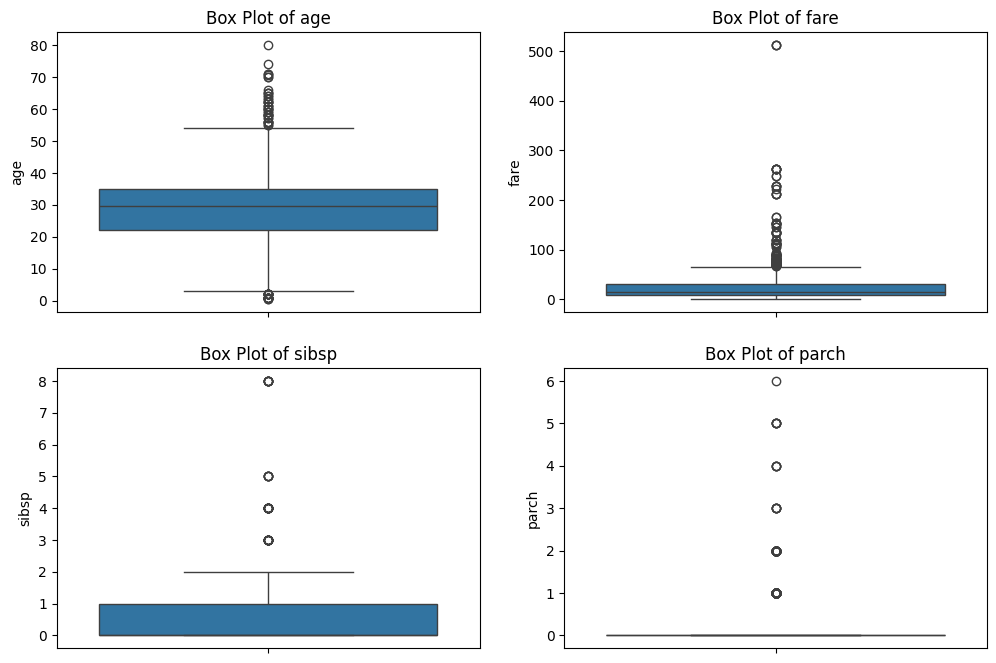

In [56]:
numerical_features = ['age', 'fare', 'sibsp', 'parch', 'family_size']
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numerical feature
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = ((df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound))

# --- Visualization: Box Plots ---
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()
